# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/
---
* [1.Tensorflow ](#Tensorflow ) <br>
     *  [설치](#Tensorflow-설치)
     *  [Numpy vs Tensorflow](#to_numeric)
         *  [  constant ](#constant)
     * [2.2 연산](#연산)<br>
         * [add](#add)<br>
         * [reduce_sum](#reduce_sum)<br>
         * [Universal function](#Universal-function)<br>
         * [broadcasting](#broadcasting)<br>       
 
* [2. DL 과정](#DL-과정) <br>
     * [ 데이터](#데이터)
     * [holdout](#holdout)<br>
     * [ Normalization](#Normalization)<br>
     * [ 모델구조](#모델-구조)<br>
     * [ 모델 학습 전략 :compile](#모델-학습-전략)<br>
     * [ 학습,검정: fit &evaluate ](#학습,검정)<br>


 ---
## Tensorflow
### 설치
- 설치부터가 장벽!!!

- 주피터노트북이 버전에 민감하므로 주피터 노트북에서 설치하지 말고 **anaconda prompt 관리자 권한**으로 이용하여 설치
  - anaconda 는 충돌이 나면 알아서 처리하기 때문
  - 2점대 버전 선택하여 설치
  - 컴퓨터가 GPU가 있는경우 GPU 설정해야함 (50배 속도 향상)

In [ ]:
#!pip install -U tensorflow

### 설치 문제점
ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.

해결 : Visual Studio 2013용 Microsoft Visual C++ 재배포 가능 패키지 다운로드
https://support.microsoft.com/ko-kr/help/2977003/the-latest-supported-visual-c-downloads
 
 이 외 문제   
해결 2. 설치  안되신분들은 대안 온라인 주피터 노트북 이용
- 웹환경이라 느림
- 연속으로 12시간 이상 사용 불가
Google Codelab https://colab.research.google.com/

해결3. 재부팅
"No module named 'tensorflow'"

해결 4. prompt 관리자 권한실행
conda install nb_conda

설치 확인법
- import tensorflow as tf가 에러없이 작동됨

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [5]:
import platform
platform.python_implementation()

'CPython'

In [6]:
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)

디버깅 용도로 초반에사용

In [7]:
tf.debugging.set_log_device_placement(True) 

## Numpy vs Tensorflow

### numpy 복습

- vectorization 
  - emelment-wise: 같은 위치의 요소를 계산함
  - 한번에 core 갯수만큼 한번에 계산됨.
- ufunc
- broadcating
  - 자동으로 형 맞춰줌 
- cpu 기반 

- Numpy 와 비슷함
    - vectorization 
      - emelment-wise: 같은 위치의 요소를 계산
    - ufunc
    - broadcating
        
- numpy와의 차이점: 
  - GPU TPU와 같은 가속기 지원
      - gpu 되는 하드웨어, 소프트웨어 있어야 GPU 기능 지원
  -  Neural Network 관련 기능 제공
  - 데이터 타입에 민감
  - immutable 
    - constant

### constant
- tensorflow 상수 텐서 생성
- `tf.constant(value, dtype=None, shape=None, name='Const')`
    - 값 value: 상수 또는 list 형태
    - dtype: 데이터 타입결정 
        - 명시하지 않는 경우 값에따라 결정

In [8]:
a=tf.constant([1,2,3]) #int32
b=tf.constant([1,2,3],dtype=tf.float64)

In [9]:
b.shape

TensorShape([3])

In [10]:
import numpy as np
c= np.array([1,2,3],dtype=np.float32)
d= np.array([1,2,3],dtype=np.float64)

In [11]:
c

array([1., 2., 3.], dtype=float32)

- scipy의 특징: numpy 기반으로 과학분야에서 많이 사용하는것을 미리 만들어 놓음
- tensofr : Nueral Net에서많이사용한것을 tensofr로 구현해 놓음
    - 내부적으로 만들어진 tensor 사용하지만 low levl 을 집접 만들 필요 없음

## tensor + flow
- Tnsor: numpy에서 3차원 이상의 배열 
  - 데이터 타입, 크기
  - GPU 가속
  - 풍부한 연산 library
  - tensor 변환
  
- Flow: feed forward, backpropagtion처럼 값을 연속적으로 보내기떄문에 흐름이라고 볼수 있음
    - numpy + auto differenciation(자동미분)
       - backpropagation 용이
    - MLP(multi-layer perceptron) 과같은 이론을 구현해 놓음

### 연산
- numpy보다 엄격함
- 데이터 타입 동일해야함
- element-wise 

#### add
- numpy와 동일
    - element-wise로 같은 위치의 원소값을 더함
    - broadcasting 


In [18]:
a+b #int, float 타입이 맞이않아 error발생

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a double tensor [Op:AddV2]

In [24]:
tf.add([1.2],[3 , 4])  #broadcasting

Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.2, 5.2], dtype=float32)>

In [21]:
tf.add(a,a) #element-wise

Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 4, 6], dtype=int32)>

In [22]:
a+a

Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 4, 6], dtype=int32)>

- numpy는 데이터 타입이 다르면 강제형변환

In [19]:
c+d

array([2., 4., 6.])

### reduce_sum|
- tensor의 모든 원소의 합
- `np.add.reduce`와 동일

In [ ]:
tf.reduce_sum([1,2,3])

Executing op Range in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sum in device /job:localhost/replica:0/task:0/device:CPU:0


<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [ ]:
np.add.reduce([1,2,3])

6

### Universal Function

In [ ]:
tf.add([3,3],[1,3])

Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0


<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [ ]:
tf.add(3,4)

Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0


<tf.Tensor: shape=(), dtype=int32, numpy=7>

### 상호 호환성
- numpy함수에 사용하면 numpy 형으로 변환됨
- tensorflow > numpy 
    - numpy 바로 변환 가능 
    - 역방향은 가능하지만 권장하지 않음

### numpy
- Tensor의 내용물을 복사해서 NumPy array(nxm) or scalar(1 x 1 ) 형태로 반환

tensor -> numpy

In [14]:
a.numpy()

array([1, 2, 3], dtype=int32)

In [26]:
(a+a).numpy()

Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0


array([2, 4, 6], dtype=int32)

In [27]:
np.add(a,b)

array([2., 4., 6.])

numpy -> tensor

In [28]:
tf.add(c,d)

Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 6.], dtype=float32)>

### broadcasting
- 길이가 다르지만 알아서 길이 맞춤

In [29]:
a+3

Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 5, 6], dtype=int32)>

## DL 과정

- 기기학습의 알고리즘 인 neural network 만들어진 모델을 가져다가 씀.
  - 데이터가 가장 중요함
#### keras
   - 딥러닝에 사용하는것을추상적으로 만들어놓아서 가장 간단하게 구현 가능
   - tf의 하위 library
   
   
###  데이터
    - 불러오기
    - holdout

In [12]:
tf.keras.datasets.mnist.load_data()#snake 방식은 function

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

len technique 
 - array 갯수 확인하여  unpacking

In [13]:
len(tf.keras.datasets.mnist.load_data())

2

In [14]:
x,y=tf.keras.datasets.mnist.load_data() #2개 unpacking

In [15]:
len(x) #x array 내부에 array2개  ->unpacking 한번더

2

In [16]:
len(y) #상동

2

### holdout
데이터를 train, test로 쪼갬
- 학습에 이용하지않는데이터로 검정하기 위해서

In [18]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
# 총 4개의 array이기 때문에 다음과 같이 나눔

 - 2^8=256 ; 색상은 0~255 개
 - 2차원이므로 흑백이미지

In [36]:
X_train.shape #3차원. 28 x 28 이 6만개

(60000, 28, 28)

In [37]:
X_train.dtype

dtype('uint8')

###  Normalization 
- 값을 0~1사이로 변경 
- MinMaxScaler 과 동일
- $\frac{x-min}{max-min}=\frac{x-0}{255-0}= \frac{x}{255}$

In [20]:
X_train, X_test =X_train/255.0 , X_test/ 255.0

In [21]:
X_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [22]:
X_train[0].shape #28x28 사이즈의 첫번째 이미지

(28, 28)

컬러 정보가 없으면 다음과 같은 색으로 보여줌

In [23]:
import matplotlib.pyplot as plt

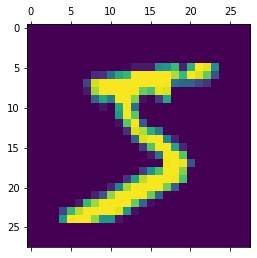

In [24]:
plt.matshow(X_train[0])  #채널 정보 없는경우 디폴트 색상

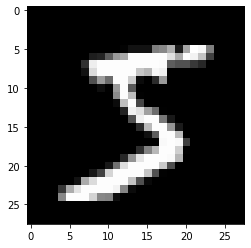

In [43]:
plt.imshow(X_train[0],cmap='gray')  #

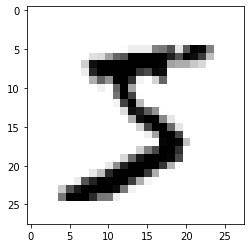

In [44]:
plt.imshow(X_train[0],cmap='binary')

해당 이미지의 라벨링 값은 5

In [45]:
y_train[0]

5


- 입력 데이터: 
    - 예측모델에서는 1차원 데이터를 입력으로 받음
- `reshape(데이터 갯수, 가로*세로)`

In [46]:
X_train.flatten() #전체 1차원이됨 -> 다른 방법 모색해야함

array([0., 0., 0., ..., 0., 0., 0.])

2차원으로 60,000개 데이터가 한줄로 바뀜

In [25]:
X_train_= X_train.reshape(60000,28*28) #60000개
X_train_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
X_train_.shape

(60000, 784)

### 모델 구조

모델 구조와 compile 학습전략에 따라 성능 결정
1. Sequential 모델 생성
    - 구조만들기
        - list 방식
        - add 방식
        
   - summary 로 구조 확인

- `Sequential`
  -  레이어를 순차적으로 연결하여
      -레이어 인스턴스를 생성자에게 넘겨줌으로써 Sequential 모델을 구성
  - 딥러닝의 구조가 일방향이기 때문 (feed forwad:output 으로)

- `Dense`
  - **fully connected ** 모든 노드들이 다 연결 되어있음

벡터행렬의 곱으로 표현하므로 행렬의 형태가 중요함
   - 행렬의 곱 : mxk @ kxn = mxn 

Neural Net 몇개의 레이어, 노드인지 정해야함.

  - layer : input layer+ hidden layer+ ... + output layer
      - input :데이터 크기 (맞추는게 중요)
      - output: 분류 갯수
      - activation function : 공간을 왜곡해서 비선형 문제 해결

In [26]:
### list 형식
#전처리해주는 레이어도있음. 
model=tf.keras.models.Sequential([
           tf.keras.layers.Dense(32, input_shape=(28*28,),activation='relu') , 
           tf.keras.layers.Dense(16),
           tf.keras.layers.Dense(10, activation='softmax')
])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalN

In [28]:
#다양한 모델을 만들 수 있음 
# 텐서기반은 GPU 사용 지원 
# add 방식
model=tf.keras.models.Sequential() #인스턴스화
model.add(tf.keras.layers.Dense(32, input_shape=(28*28,),activation='relu')) #input layer
model.add(tf.keras.layers.Dense(16)) 
model.add(tf.keras.layers.Dense(10,activation='softmax'))  #output layer : 0~9 까지 총 10개로 분류해야하므로 Dense(10)
model.summary()

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalN

- layer : fully-connected(전체 연결됨)
- output shape : 노드 갯수
     
    - 첫번째 레이어 퍼셉트론의 노드 32개 
    - 두번째 레이어 퍼셉트론의 노드 16개
    - 출력 레이어의 10개 클래스 (숫자 0~9)
- Para # : 파라미터수 

---
sklearn의 MLP는 위와 동일함
- 아래와 같이 다양한 옵션들 있음
- 위의 방식보다 활용성 떨어짐 
    - 한방향으로만 가능

In [29]:
from sklearn.neural_network import MLPClassifier

In [30]:
mlp=MLPClassifier((32,16,10))  #단방향

In [31]:
mlp.fit(X_train_, y_train)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(32, 16, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [57]:
vars(mlp)

{'activation': 'relu',
 'solver': 'adam',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'power_t': 0.5,
 'max_iter': 200,
 'loss': 'log_loss',
 'hidden_layer_sizes': (32, 16, 10),
 'shuffle': True,
 'random_state': None,
 'tol': 0.0001,
 'verbose': False,
 'warm_start': False,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 'n_iter_no_change': 10,
 'max_fun': 15000,
 '_label_binarizer': LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False),
 'classes_': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 'n_outputs_': 10,
 '_random_state': RandomState(MT19937) at 0x7FC34B8359E0,
 'n_iter_': 127,
 't_': 7620000,
 'n_layers_': 5,
 'out_activation_': 'softmax',
 'coefs_': [array([[ 4.47133475e-315,  3.12160115e-315,  2.05412566e-315, ...,
          -1.84049516e-315, -1.06997410e-315,  4.35104543e-315],
         [ 3.699

### 모델 학습 전략
  - 모델 학습전 compile 메소드로 학습방식에 대한 환경 설정 
  - loss : 모델 최적화를 위한 손실 함수 
      - categorical_crossentropy 
      - mse
  - optimizer:정규화
  - metrics :여러 평가척도 (accuracy, recall, precisoin, f-1 score...)
    - confusion matrix 에서 배움

In [33]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', )

Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:lo

### 학습,검정
- fit
- evaluate

In [34]:
X_train_.reshape(-1,28*28).shape

(60000, 784)

In [35]:
X_test=X_test.reshape(-1,28*28)

In [36]:
X_test.shape

(10000, 784)

In [37]:
y_train.shape

(60000,)

In [38]:
X_train.shape

(60000, 28, 28)

In [41]:
#복잡한 모델을 다양한 옵션으로 만듦.
model.fit(X_train.reshape(-1,28*28), y_train,epochs=1)
model.evaluate(X_test.reshape(-1,784), y_test ) #sklearn 의 score

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op M

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
  71/1875 [>.............................] - ETA: 10s - loss: 0.6590Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_7

 140/1875 [=>............................] - ETA: 12s - loss: 0.6356Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 149/1875 [=>............................

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 218/1875 [==>...........................] - ETA: 11s - loss: 0.6183Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_7

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 298/1875 [===>..........................] - ETA: 10s - loss: 0.6100Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_7

 371/1875 [====>.........................] - ETA: 10s - loss: 0.5991Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_7

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 453/1875 [======>.......................] - ETA: 9s - loss: 0.5910Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 536/1875 

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 606/1875 [========>.....................] - ETA: 7s - loss: 0.5766Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 683/1875 [=========>....................] - ETA: 7s - loss: 0.5695Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 760/1875 [===========>..................] - ETA: 6s - loss: 0.5613Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 839/1875 [============>.................] - ETA: 6s - loss: 0.5562Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
 922/1875 [=============>................] - ETA: 5s - loss: 0.5511Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1001/1875 [===============>..............] - ETA: 5s - loss: 0.5461Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1074/1875 [================>.............] - ETA: 4s - loss: 0.5417Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1153/1875 [=================>............] - ETA: 4s - loss: 0.5387Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1233/1875 [==================>...........] - ETA: 3s - loss: 0.5347Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1308/1875 [===================>..........] - ETA: 3s - loss: 0.5317Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1387/1875 [=====================>........] - ETA: 2s - loss: 0.5285Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1464/1875 [======================>.......] - ETA: 2s - loss: 0.5243Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1539/1875 [=======================>......] - ETA: 1s - loss: 0.5224Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1546/1875 [=======================>......] - ETA: 1s - loss: 0.5226Executing op __inference_train_function_768 in device /job:localhost/repli

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1617/1875 [========================>.....] - ETA: 1s - loss: 0.5209Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1700/1875 [==========================>...] - ETA: 1s - loss: 0.5185Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
1774/1875 [===========================>..] - ETA: 0s - loss: 0.5144Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

1849/1875 [============================>.] - ETA: 0s - loss: 0.5105Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_768 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_train_function_76

Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
 40/313 [==>...........................] - ETA: 1s - loss: 0.4864Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 

Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
116/313 [==========>...................] - ETA: 1s - loss: 0.5082Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 

Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
202/313 [==================>...........] - ETA: 0s - loss: 0.4813Executing op __inference_test_function_2783 

270/313 [========================>.....] - ETA: 0s - loss: 0.4415Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 

0.4285552203655243

In [42]:
model.evaluate(X_test,y_test)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op M

Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
 69/313 [=====>........................] - ETA: 1s - loss: 0.5263Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 

143/313 [============>.................] - ETA: 0s - loss: 0.5244Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
151/313 [=============>................] - ETA: 0s - loss: 0.5186Executing op __inference_test_function_2783 in device /job:localhost/replica:0

Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
227/313 [====================>.........] - ETA: 0s - loss: 0.4653Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 

Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
302/313 [===========================>..] - ETA: 0s - loss: 0.4226Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_2783 

0.4285552203655243

전반적인 과정은 sklearn 과 크게 차이가 없음
- sklearn : 기계학습 전반적으로 쓰는 프레임워크
- tf: 뉴럴네트워크 에 집주됨
- 모델 구해서 선택한 metric기준으로 어떠한지 평가
- 해당 학습한 모델을 저장하여 불러와서 사용 가능.
---
Tensorflow 튜토리얼 https://www.tensorflow.org/tutorials/quickstart/beginner
  - 고급반에 이어서 해야하니 복습!
  - 응용하려면 수학 필요함! 나중에 분위기 좋을떄 할 예정.

In [ ]:
# 튜토리얼 부분을 자세히 다룰 예정 : activation function..
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])